# Classification: Deep Learning

In diesem Notebook verwenden wir Neuronale Netze um die Klassifizierung in "Failure"/"No Failure " durchzuführen.

In [11]:
import glob
import os
os.environ['KERAS_BACKEND'] = 'theano' # Because tensorflow don't work on my machine
#os.environ['THEANO_FLAGS'] = "device=cuda,force_device=True,floatX=float32"
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split
from Evaluator import Evaluator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import Helpers

epochs = 150
evaluator = Evaluator()

# Path of the dataset, load data and labels using generator method
# (Generator combines folders with multiple data CSV files to one numpy array and finds corresponding label for each CSV)
path_data = '/Users/marvinwoller/Desktop/SmartDataAnalytics/Blatt2/data/'
path_train = path_data + 'resampled/resampled_12H/mean/'
path_test = path_data + 'resampled_test/resampled_12H/mean/'

Evaluator started


In [7]:
# Load data
data, labels = Helpers.data_label_generator_for_resampled_data(path=path_train)

Reading CSVs: |██████████████████████████████████████████████████| 100.0% Complete


In [3]:
data_test, labels_test = Helpers.data_label_generator_for_resampled_data(path=path_test, train_or_test='test')

Reading CSVs: |██████████████████████████████████████████████████| 100.0% Complete


Train on 105645 samples, validate on 11739 samples
Epoch 1/150
105645/105645 [==============================] - 1s 6us/step - loss: 6.0287 - acc: 0.5711 - val_loss: 4.9884 - val_acc: 0.6062

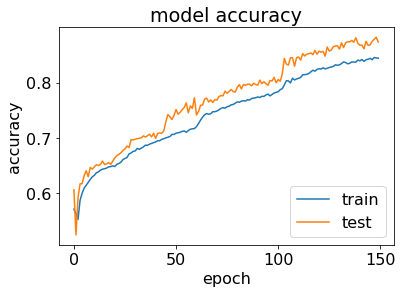

YVal: 0.471123510546763


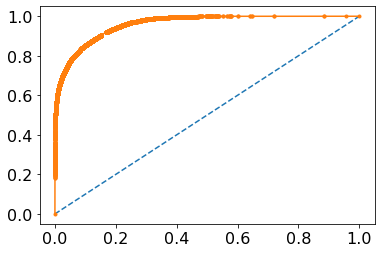

AUC: 0.960


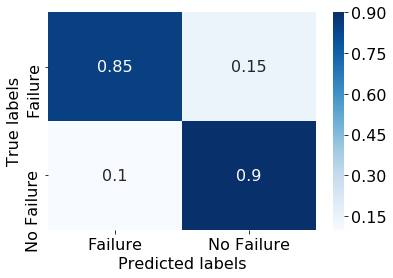

FP: 5920.000000001
FN: 3832.000000001
TP: 34521.000000001004
TN: 33984.000000001004
TPR: 0.900086042812797
TNR: 0.8516439454691082
PPV: 0.853613906678848
NPV: 0.898667230801756
FAR: 0.1483560545308917
FRR: 0.09991395718720308
FDR: 0.14638609332115196


In [12]:
# define the keras model
model = Sequential()
model.add(Dense(64, input_dim = 72, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, random_state=2, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

#Callback definition
#earlystop = EarlyStopping(patience=10)
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
#callbacks = [earlystop, learning_rate_reduction]

# fit the keras model on the dataset
#history = model.fit(X, y, validation_split=0.1, shuffle=True, epochs=500, batch_size=512, verbose=1)
history = model.fit(X_train, y_train, epochs=epochs, batch_size=1024, verbose=1, validation_data=[X_val, y_val])

evaluator.predict(model, X_test, y_test)
#evaluator.saveModel(model,"DNN")
evaluator.evaluateACC(history)
evaluator.evaluateROC()
evaluator.evaluateAUC()
evaluator.evaluateCM()
evaluator.others()

evaluator.predict(model, data_test, labels_test)
#evaluator.evaluateACC(history)
evaluator.evaluateROC()
evaluator.evaluateAUC()
evaluator.evaluateCM()
evaluator.others()

del evaluator, model

# Classification Deep Neural Network with LSTM